In [1]:
%matplotlib inline
%pylab inline

#Modules.
from Classes import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
myParameters = dict([
['R0', 1.4],            #Basic reproduction number.
['gamma', 5/7.],       #Waning immunity rate. Mean beta distribution = alpha/(alpha+beta) = 10/12
['Vc', 0.10001],            #Vaccine coverage.
['Ve', 1.0],            #Vaccine efficiency.
['Vr', 0.5]])           #Vaccine resistance.

In [3]:
R0 = 1.4

nu1 = 2.5                                    #Latent to infectious rate.
nu2 = 1.1                                    #Recovery rate.    
beta = nu2*R0/2.0                            #Transmitability parameter.


contactMatrix = np.array([[9,3,1],[3,3,2],[1,2,2]])      #Contact matrix between young, middle, and old.
demography = np.array([1/8.,5/8.,2/8.])

cij = fun.giveContactMatrix()

years = 150

In [4]:
import time

start = time.time()

years = 150

susceptibilies, finalSizes, peaks = fun.calculateTimeseries(myParameters,years,'Stochastic')

end = time.time()

print end-start

16.6532249451


In [16]:
sweepVc = [0,0.25]
ReffsSweep = dict([ ['Deterministic',[]], ['Stochastic',[]] ])

for mode in ReffsSweep.keys():
    for Vc in sweepVc:
        print Vc,
    
        susceptibilies, finalSizes, peaks = fun.calculateTimeseries(myParameters,years,mode)

        Reffs = []
    
        for s,p in zip(susceptibilies['s'][50:], susceptibilies['p'][50:]):

            currentStateContact = (2*beta/nu2)*(demography*s*cij + demography*p*cij)


            eigenvalues, eigenvectors = np.linalg.eig(currentStateContact)
            Reffs += [ eigenvalues[0] ]

        ReffsSweep[mode] += [ Reffs ]


0 0.25 0 0.25


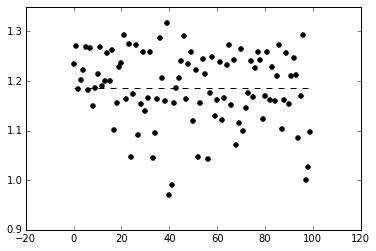

In [17]:
Reffs = ReffsSweep['Stochastic'][1]

scatter(range(years-50),Reffs, color = 'black')
plot([0,years-50],[mean(Reffs),mean(Reffs)], 'k--')